In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import files
uploaded = files.upload()
train_df = pd.read_csv('train.csv')


Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded = files.upload()
test_df = pd.read_csv('test.csv')

Saving test.csv to test.csv


In [5]:
train_df.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43


In [6]:
train_df.isna().sum()

patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
dtype: int64

In [7]:
train_df['text'] = train_df['review_by_patient'] + ' ' + train_df['use_case_for_drug'] + ' ' + train_df['name_of_drug']
del train_df['review_by_patient']
del train_df['use_case_for_drug']
del train_df['name_of_drug']
del train_df['drug_approved_by_UIC']
del train_df['patient_id']

In [8]:
train_df.head()

,effectiveness_rating,number_of_times_prescribed,text
0,9,27,"""It has no side effect, I take it in combinati..."
1,8,192,"""My son is halfway through his fourth week of ..."
2,5,17,"""I used to take another oral contraceptive, wh..."
3,9,37,"""Suboxone has completely turned my life around..."
4,2,43,"""2nd day on 5mg started to work with rock hard..."


In [9]:
train_df.effectiveness_rating.value_counts()

10    10252
9      5429
1      4295
8      3786
7      1832
5      1581
2      1422
6      1289
3      1267
4      1012
Name: effectiveness_rating, dtype: int64

In [10]:
# Max and Min Rating
min_rating = train_df.effectiveness_rating.min()
max_rating = train_df.effectiveness_rating.max()
min_rating , max_rating

(1, 10)

In [12]:
def scale_rating(rating):
   
    rating -= min_rating
    rating = rating/(max_rating - 1)
    rating *= 5
    rating = int(round(rating,0))
    if(int(rating) == 0 or int(rating) == 1 or int(rating) == 2):
        return 0
    else:
        return 1

In [13]:
train_df.effectiveness_rating = train_df.effectiveness_rating.apply(scale_rating)

In [14]:
train_df.effectiveness_rating.value_counts()

1    22588
0     9577
Name: effectiveness_rating, dtype: int64

In [28]:
 import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [29]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [41]:
train_df.text = train_df.text.apply(lemmatize_words)

In [32]:
train_df.head()

,effectiveness_rating,number_of_times_prescribed,text
0,1,27,"""It has no side effect, I take it in combinati..."
1,1,192,"""My son is halfway through his fourth week of ..."
2,0,17,"""I used to take another oral contraceptive, wh..."
3,1,37,"""Suboxone has completely turned my life around..."
4,0,43,"""2nd day on 5mg started to work with rock hard..."


In [33]:
test_df.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia


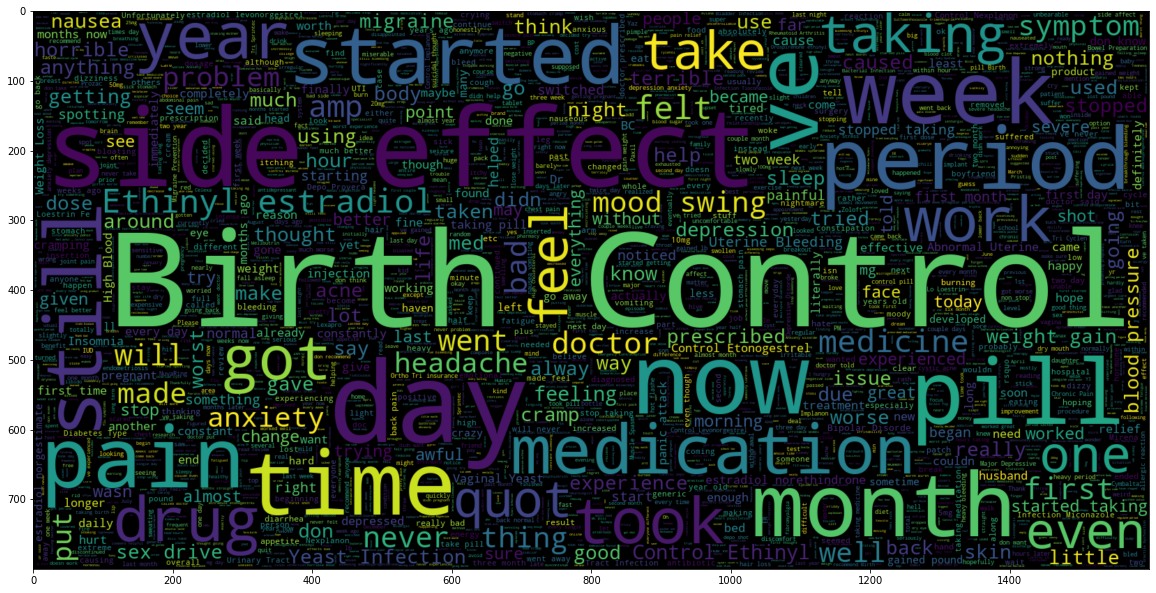

In [34]:
plt.figure(figsize = (20,20)) # Poor Reviews
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(train_df[train_df.effectiveness_rating == 0].text)))
plt.imshow(wc,interpolation = 'bilinear')

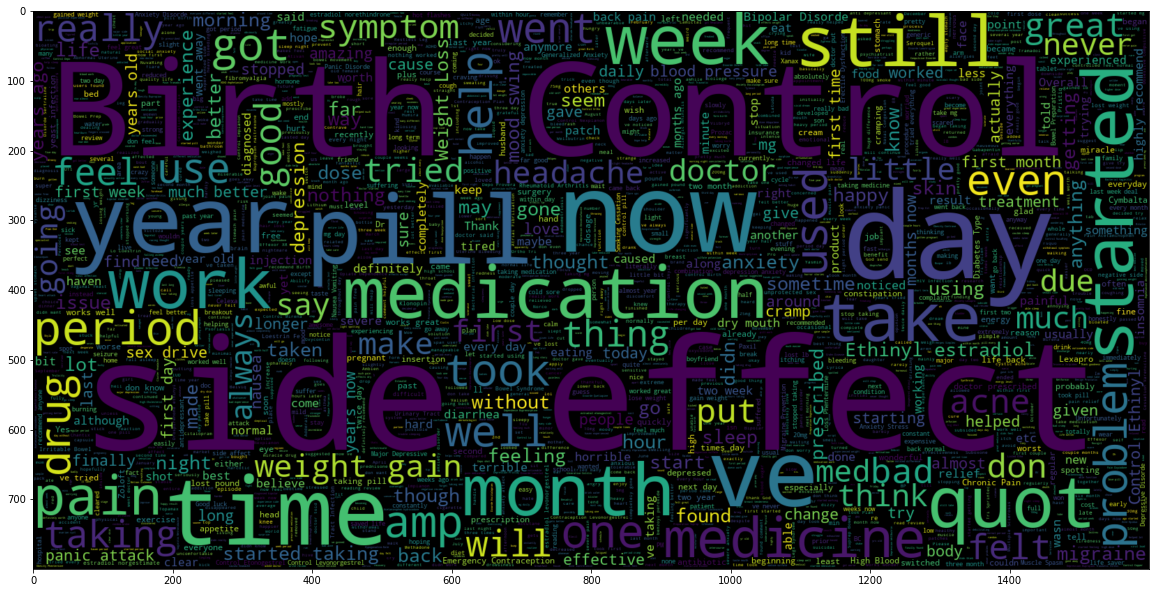

In [35]:
plt.figure(figsize = (20,20)) # Good Reviews
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(train_df[train_df.effectiveness_rating == 1].text)))
plt.imshow(wc,interpolation = 'bilinear')

In [37]:
x_train,x_test,y_train,y_test = train_test_split(train_df.text , train_df.effectiveness_rating)

In [38]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (24123, 1165001)
BOW_cv_test: (8042, 1165001)


In [40]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 75 , activation = 'relu'))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))